<a href="https://colab.research.google.com/github/electrojam/Curso-de-Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn/blob/main/decision_tree_random_forest_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [3]:
#Importamos las librerias principales

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [4]:
#Cargamos dataset a utilizar

df_car = pd.read_csv('car_evaluation.csv', header=None) # header=None, dataframe sin nombre de columnas
df_car

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Análisis exploratorio de datos

In [5]:
#Visualizacion del dataframe

df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [6]:
#Analizamos el shape del objeto

print(df_car.shape)

(1728, 7)


In [7]:
#Como podemos observar vamos a renombrar las columnas de manera correcta

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

In [8]:
#Vericamos la transformacion

df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [9]:
#Visualizamos los tipos de datos

df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [10]:
# Exploremos un poco mas la variable target

df_car['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [11]:
#Verificamos valores missings = null

df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [12]:
#Separamos en X e y

X = df_car.drop(['class'], axis=1)
y = df_car['class']

In [13]:
#Importamos las librerias necesarias para la creacion del modelo

from sklearn.model_selection import train_test_split

#30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
#Veamos que obtuvimos

X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [15]:
y_train.shape, y_test.shape

((1209,), (519,))

In [16]:
#Veamos que tenemos. Por ejemplo, en X_train

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [17]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

# Entrenamiento de modelo de clasificación con árbol de decisión

In [18]:
# Instalamos libreria category-encoders en google colab
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [19]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
#convertimos variables categóricas a variables numéricas, en X_train

import category_encoders as ce

# definimos variable encoder

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
#Verificamos la transformacion

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [21]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


In [22]:
#Importar árbol de decisión

from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
# Definimos objeto que tendrá el modelo

tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [23]:
#Entrenamiento

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [24]:
#Calculo de las predicciones en Train y Test

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [25]:
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [26]:
print(y_train_pred_tree.shape)
print(y_test_pred_tree.shape)

(1209,)
(519,)


### Evaluación de modelo de clasificación con árbol de decisión

In [27]:
#Calculo de metricas
# importamos librerias

from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


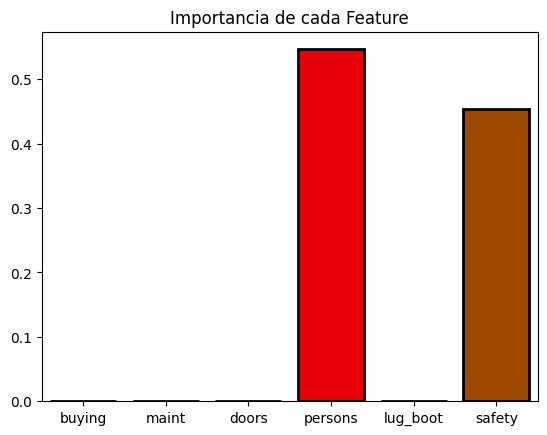

In [28]:
#Verificamos el feature importances
# Importamos librería

import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

# Reto entrenamiento solamente con features persons y security

In [29]:
# Procesamiento de datos
# Separamos en X e y

Xreto = df_car.drop(['buying','maint','doors','lug_boot','class'], axis=1)
yreto = df_car['class']

# 30% para test y 70% para train
Xreto_train, Xreto_test, yreto_train, yreto_test = train_test_split(Xreto, yreto, test_size=0.30, random_state=42)

In [30]:
print(Xreto_train.shape, Xreto_test.shape)
print(yreto_train.shape, yreto_test.shape)

(1209, 2) (519, 2)
(1209,) (519,)


In [31]:
# Entrenamiento de modelo de clasificación con árbol de decisión

#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
#convertimos variables categóricas a variables numéricas, en X_train

# Definimos variable encoder

encoder_reto = ce.OrdinalEncoder(cols = ['persons', 'safety'])

Xreto_train = encoder_reto.fit_transform(Xreto_train)
Xreto_test = encoder_reto.transform(Xreto_test)

#verificamos la transformación
Xreto_train.head()

,persons,safety
1178,1,1
585,2,2
1552,1,3
1169,3,1
1033,3,3


In [32]:
Xreto_test.head()

,persons,safety
599,3,1
1201,1,3
628,3,3
1498,1,3
1263,2,2


In [33]:
# Creación del modelo
# definimos objeto que tendrá el modelo

tree_reto = DecisionTreeClassifier(max_depth=2, random_state=0)

# Entrenamiento

tree_reto.fit(Xreto_train, yreto_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [34]:
# Cálculo de las predicciones en Train y Test

yreto_train_pred_tree = tree_reto.predict(Xreto_train)
yreto_test_pred_tree = tree_reto.predict(Xreto_test)

In [35]:
# Evaluación de modelo
# cálculo de métricas

# Cálculo de accuracy en train

train_reto_accuracy_tree = accuracy_score(yreto_train, yreto_train_pred_tree)

# Cálculo de accuracy en test

test_reto_accuracy_tree = accuracy_score(yreto_test, yreto_test_pred_tree)

print('El accuracy en train es: ', train_reto_accuracy_tree)
print('El accuracy en test es: ', test_reto_accuracy_tree)

El accuracy en train es:  0.7733664185277088
El accuracy en test es:  0.7591522157996147


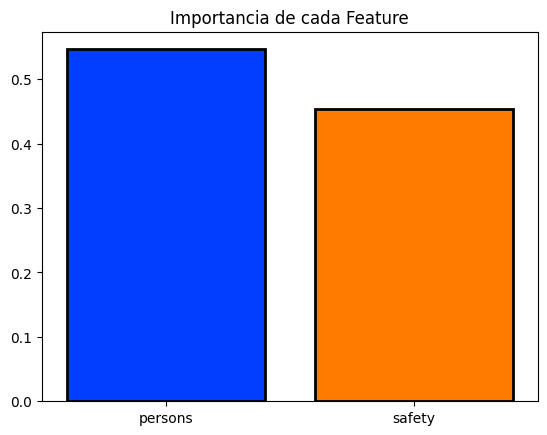

In [36]:
# Verificamos Features importances

importances_reto = tree_reto.feature_importances_
columns_reto = Xreto.columns
data_reto = pd.DataFrame([importances_reto], columns=columns_reto)
sns.barplot(data_reto, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

## Entrenamiento de modelo de clasificación con random forest

In [37]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [44]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [39]:
#Calculo de metricas

#Calculo el accuracy en Train


#Calculo el accuracy en Test


#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

In [40]:
# Visualizacion de las feature importantes


In [41]:
#Grafico de barras


In [42]:
# Matriz de confusion del RF


In [43]:
#RF
